In [ ]:
# Step 1: Import necessary libraries
import tensorflow as tf # : Deep learning libraries for building and training neural networks.
from tensorflow import keras

from keras.models import Sequential ## The Sequential class is used to create a linear stack of layers for the neural network from kers.models
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
## keras.layers: These modules contain various types of layers that can be added to the neural network. In this case:

    # Dense: Fully connected layer, where each neuron is connected to every neuron in the previous and next layers.
    # Dropout: A regularization technique that randomly sets a fraction of input units to zero during training to prevent overfitting.
    # Conv2D: Convolutional layer for 2D spatial convolution.
    # MaxPool2D: Max pooling layer for 2D spatial data.
    # Flatten: Flatten layer to convert the input into a one-dimensional array.
from keras.utils import to_categorical # used to one-hot encode the labels of the MNIST dataset (convert catagorical to binary class matrices)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### The CIFAR10 dataset contains 60,000 color images in 10 classes, with 6,000 images in each class. The dataset is divided into 50,000 training images and 10,000 testing images. The classes are mutually exclusive and there is no overlap between them.

In [ ]:
# Step 2: Load the CIFAR-10 dataset
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
print("x_train shape :", x_train.shape)
print("y_train shape :", y_train.shape)
print("x_test shape  :", x_test.shape)
print("y_test shape  :", y_test.shape)

x_train shape : (50000, 32, 32, 3)
y_train shape : (50000, 1)
x_test shape  : (10000, 32, 32, 3)
y_test shape  : (10000, 1)



#### Verify the data
To verify that the dataset looks correct, let's plot the first 100 images from the training set and display the class name below each image:

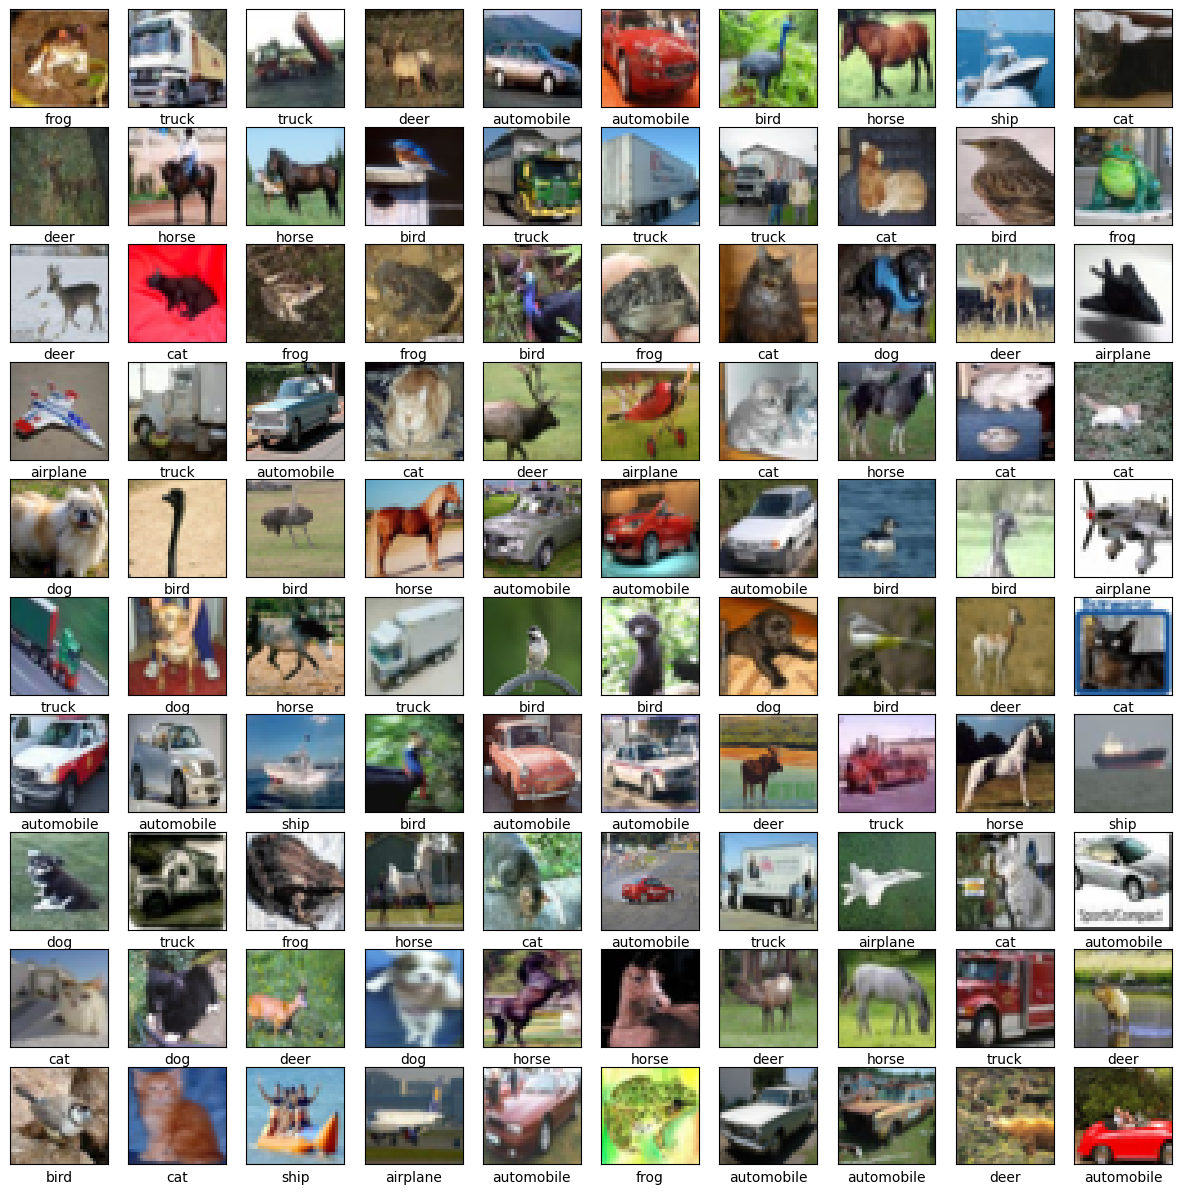

In [ ]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(15,15))
for i in range(100):
    plt.subplot(10,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
    # The CIFAR labels happen to be arrays,
    # which is why you need the extra index
    plt.xlabel(class_names[y_train[i][0]])
plt.show()

In [ ]:
print(x_train[0])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ...
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ...
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ...
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ...

 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ...
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ...
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ...
  [216 184 140]
  [151 118  84]
  [123  92  72]]]


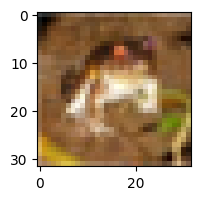

In [ ]:
# Display the first image in the training set.
image_to_display = x_train[0]

# Set the size of the figure
plt.figure(figsize=(2,2))  # Adjust the width and height as needed

# Display the scaled-down image
plt.imshow(image_to_display)
plt.show()

In [ ]:
y_train[0]

array([6], dtype=uint8)

The output array([6], dtype=uint8) indicates that the label of the first training image in the CIFAR-10 dataset is 6. In the context of CIFAR-10, each integer label corresponds to a specific class:

    0: Airplane
    1: Automobile
    2: Bird
    3: Cat
    4: Deer
    5: Dog
    6: Frog
    7: Horse
    8: Ship
    9: Truck

In [ ]:
# Step 3: Preprocess the images
# Resize images to a consistent size (e.g., 32x32 pixels) with padding
img_size = (32, 32)
x_train = tf.image.resize_with_pad(x_train, img_size[0], img_size[1])
x_test = tf.image.resize_with_pad(x_test, img_size[0], img_size[1])
X_train = tf.cast(x_train, 'float32')
X_test = tf.cast(x_test, 'float32')

In [ ]:
print("X_train shape :", X_train.shape)
print("y_train shape :", y_train.shape)
print("X_test shape  :", X_test.shape)
print("y_test shape  :", y_test.shape)

X_train shape : (50000, 32, 32, 3)
y_train shape : (50000, 1)
X_test shape  : (10000, 32, 32, 3)
y_test shape  : (10000, 1)


In [ ]:
# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

In [ ]:
X_train[0]

<tf.Tensor: shape=(32, 32, 3), dtype=float32, numpy=
array([[[0.23137255, 0.24313726, 0.24705882],
        [0.16862746, 0.18039216, 0.1764706 ],
        [0.19607843, 0.1882353 , 0.16862746],
        ...,
        [0.61960787, 0.5176471 , 0.42352942],
        [0.59607846, 0.49019608, 0.4       ],
        [0.5803922 , 0.4862745 , 0.40392157]],

       [[0.0627451 , 0.07843138, 0.07843138],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509805, 0.21568628],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117648, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215687, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941177, 0.19607843],
        [0.47058824, 0.32941177, 0.19607843],
        [0.42745098, 0.28627452, 0.16470589]],

       ...,

       [[0.8156863 , 0.6666667 , 0.3764706 ],
        [0.7882

In [ ]:
# One-hot encode the class labels
print("Shape before one-hot encoding : ", y_train.shape)
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)
print("Shape after one-hot encoding  : ", y_train.shape)

Shape before one-hot encoding :  (50000, 1)
Shape after one-hot encoding  :  (50000, 10)


In [ ]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
# Step 4: Data Augmentation (Optional but recommended)
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )

datagen.fit(X_train)

In [ ]:
# Step 5: Build the CNN model
model = Sequential()

# Convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))  # Pooling layer

model.add(Conv2D(64, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))  # Pooling layer

model.add(Conv2D(128, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))  # Pooling layer

# Fully connected layers
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Optional dropout layer

# Output layer
model.add(Dense(10, activation='softmax'))  # Assuming 10 classes for CIFAR-10

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# ***Summarizing the Model***

In [ ]:
model.summary(line_length=100)

Model: "sequential"
____________________________________________________________________________________________________
 Layer (type)                                Output Shape                            Param #        
 conv2d (Conv2D)                             (None, 30, 30, 32)                      896            
                                                                                                    
 max_pooling2d (MaxPooling2D)                (None, 15, 15, 32)                      0              
                                                                                                    
 conv2d_1 (Conv2D)                           (None, 13, 13, 64)                      18496          
                                                                                                    
 max_pooling2d_1 (MaxPooling2D)              (None, 6, 6, 64)                        0              
                                                                       

# ***Compiling the Model***

In [ ]:
# Step 6: Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Step 7: Train the model
epochs = 30
batch_size = 32

history = model.fit(datagen.flow(X_train, y_train, batch_size=batch_size),
                    epochs=epochs,
                    validation_data=(X_test, y_test))

Epoch 1/30
1563/1563 [==============================] - 60s 37ms/step - loss: 1.7027 - accuracy: 0.3702 - val_loss: 1.2754 - val_accuracy: 0.5434
Epoch 2/30
1563/1563 [==============================] - 54s 35ms/step - loss: 1.3510 - accuracy: 0.5142 - val_loss: 1.1680 - val_accuracy: 0.5864
Epoch 3/30
1563/1563 [==============================] - 53s 34ms/step - loss: 1.2155 - accuracy: 0.5682 - val_loss: 1.0567 - val_accuracy: 0.6225
Epoch 4/30
1563/1563 [==============================] - 53s 34ms/step - loss: 1.1372 - accuracy: 0.5997 - val_loss: 0.9822 - val_accuracy: 0.6569
Epoch 5/30
1563/1563 [==============================] - 52s 33ms/step - loss: 1.0765 - accuracy: 0.6217 - val_loss: 0.9586 - val_accuracy: 0.6683
Epoch 6/30
1563/1563 [==============================] - 53s 34ms/step - loss: 1.0346 - accuracy: 0.6367 - val_loss: 0.9144 - val_accuracy: 0.6839
Epoch 7/30
1563/1563 [==============================] - 53s 34ms/step - loss: 0.9953 - accuracy: 0.6532 - val_loss: 0.8689 -

## ***Evaluating the Model***

In [ ]:
# Step 8: Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Model Accuracy :', test_acc)
print('Model Loss     :', test_loss)

313/313 [==============================] - 2s 8ms/step - loss: 0.6964 - accuracy: 0.7665
Model Accuracy : 0.7664999961853027
Model Loss     : 0.696431577205658


In [ ]:
# Visualize training history

# list all data in history
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

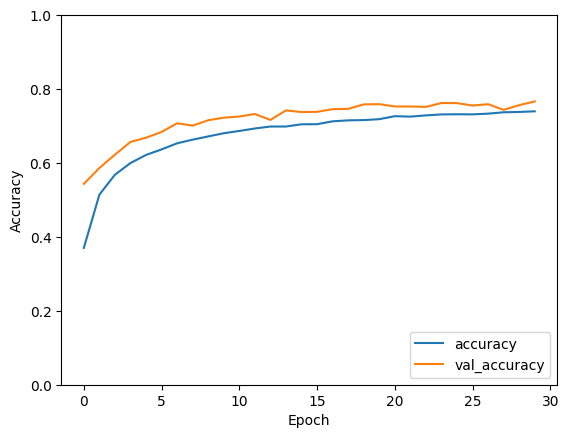

In [ ]:
# Step 9: Plot training history (optional)
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

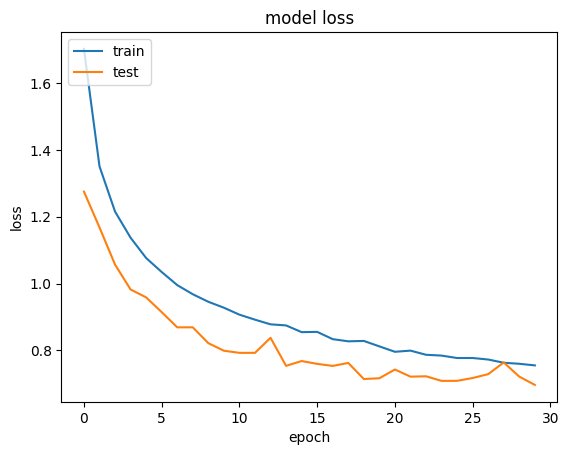

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


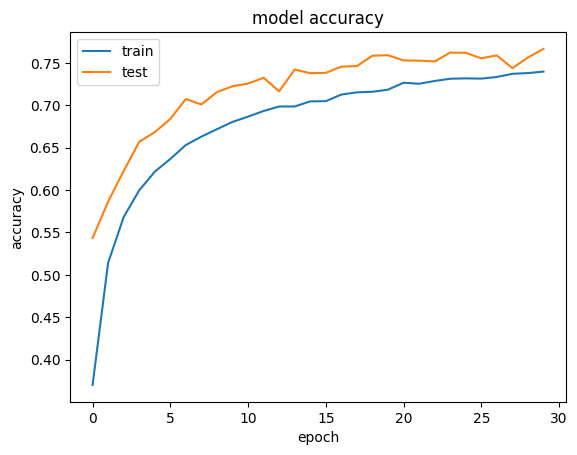

In [ ]:
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# ***Performing the Prediction using the Trained Model***

In [ ]:
X_test[9]

<tf.Tensor: shape=(32, 32, 3), dtype=float32, numpy=
array([[[0.8509804 , 0.84313726, 0.81960785],
        [0.8235294 , 0.8156863 , 0.7921569 ],
        [0.8039216 , 0.8156863 , 0.7490196 ],
        ...,
        [0.6666667 , 0.72156864, 0.6156863 ],
        [0.6313726 , 0.6901961 , 0.58431375],
        [0.63529414, 0.64705884, 0.58431375]],

       [[0.87058824, 0.8862745 , 0.83137256],
        [0.8666667 , 0.8784314 , 0.83137256],
        [0.8627451 , 0.88235295, 0.8235294 ],
        ...,
        [0.7176471 , 0.74509805, 0.6666667 ],
        [0.7294118 , 0.7490196 , 0.6784314 ],
        [0.78431374, 0.77254903, 0.7294118 ]],

       [[0.91764706, 0.92156863, 0.9019608 ],
        [0.9137255 , 0.91764706, 0.8980392 ],
        [0.90588236, 0.91764706, 0.8901961 ],
        ...,
        [0.7921569 , 0.80784315, 0.7372549 ],
        [0.8156863 , 0.81960785, 0.77254903],
        [0.827451  , 0.8235294 , 0.7764706 ]],

       ...,

       [[0.63529414, 0.627451  , 0.78039217],
        [0.5921

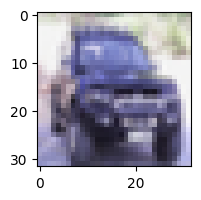

In [ ]:
import matplotlib.pyplot as plt

# Assuming X_test is the preprocessed and normalized test data
image_to_display = X_test[9]

# Set the size of the figure
plt.figure(figsize=(2,2))  # Adjust the width and height as needed

# Display the scaled-down image
plt.imshow(image_to_display)
plt.show()

In [ ]:
X_test[9].shape

TensorShape([32, 32, 3])

In [ ]:
import tensorflow as tf

# Reshape the input data using tf.reshape
X_test_reshaped = tf.reshape(X_test[9], (1, 32, 32, 3))

# Make predictions using the model
model.predict(X_test_reshaped)

1/1 [==============================] - 0s 109ms/step


array([[4.4313907e-03, 6.2491196e-01, 2.9026385e-02, 2.1528744e-03,
        2.1368002e-04, 1.7375195e-03, 4.9129110e-03, 1.4736090e-03,
        1.3976741e-03, 3.2974193e-01]], dtype=float32)

In [ ]:
#  model is the trained CNN model
# X_test is the preprocessed and normalized test data
import numpy as np

# Function to get the label name based on the predicted class index
def get_label_name(predicted_class_index):
    label_names = {
        0: 'Airplane',
        1: 'Automobile',
        2: 'Bird',
        3: 'Cat',
        4: 'Deer',
        5: 'Dog',
        6: 'Frog',
        7: 'Horse',
        8: 'Ship',
        9: 'Truck'
    }
    return label_names.get(predicted_class_index, 'Unknown')

# Example: Predict the class for the 10th test image
prediction = model.predict(np.array(X_test[9]).reshape(1, 32, 32, 3))
predicted_class_index = np.argmax(prediction)

# Get the label name based on the predicted class index
predicted_label = get_label_name(predicted_class_index)

# Print the result
print(f"Predicted Class Index: {predicted_class_index}")
print(f"Predicted Label: {predicted_label}")



1/1 [==============================] - 0s 24ms/step
Predicted Class Index: 1
Predicted Label: Automobile


In [ ]:
y_test[9]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

## Saving the Model


In [ ]:
import pickle

In [ ]:
with open ('CNNimage_class.pkl', 'wb') as image_class:
  pickle.dump(model,image_class)

## Loading the saving model

In [ ]:
with open ('CNNimage_class.pkl', 'rb') as image_class:
  loaded_model = pickle.load(image_class)

In [ ]:
loaded_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 15, 15, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 4, 4, 128)         73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 2, 2, 128)         0

##  Performing Prediction useing loded model

In [ ]:
X_test[1]

<tf.Tensor: shape=(32, 32, 3), dtype=float32, numpy=
array([[[0.92156863, 0.92156863, 0.92156863],
        [0.90588236, 0.90588236, 0.90588236],
        [0.9098039 , 0.9098039 , 0.9098039 ],
        ...,
        [0.9137255 , 0.9137255 , 0.9137255 ],
        [0.9137255 , 0.9137255 , 0.9137255 ],
        [0.9098039 , 0.9098039 , 0.9098039 ]],

       [[0.93333334, 0.93333334, 0.93333334],
        [0.92156863, 0.92156863, 0.92156863],
        [0.92156863, 0.92156863, 0.92156863],
        ...,
        [0.9254902 , 0.9254902 , 0.9254902 ],
        [0.9254902 , 0.9254902 , 0.9254902 ],
        [0.92156863, 0.92156863, 0.92156863]],

       [[0.92941177, 0.92941177, 0.92941177],
        [0.91764706, 0.91764706, 0.91764706],
        [0.91764706, 0.91764706, 0.91764706],
        ...,
        [0.92156863, 0.92156863, 0.92156863],
        [0.92156863, 0.92156863, 0.92156863],
        [0.91764706, 0.91764706, 0.91764706]],

       ...,

       [[0.34117648, 0.3882353 , 0.34901962],
        [0.1686

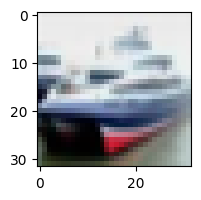

In [ ]:
# X_test is the preprocessed and normalized test data
image_to_display = X_test[1]

# Set the size of the figure
plt.figure(figsize=(2,2))  # Adjust the width and height as needed

# Display the scaled-down image
plt.imshow(image_to_display)
plt.show()

In [ ]:
X_test[1].shape

TensorShape([32, 32, 3])

In [ ]:
# Reshape the input data using tf.reshape
X_test_reshaped1 = tf.reshape(X_test[1], (1, 32, 32, 3))

# Make predictions using the model
model.predict(X_test_reshaped1)

1/1 [==============================] - 0s 17ms/step


array([[6.8384232e-03, 6.3846543e-02, 3.5518031e-05, 9.6238264e-06,
        3.3617674e-08, 1.1525166e-07, 8.7894747e-08, 2.9834908e-07,
        9.2866504e-01, 6.0436671e-04]], dtype=float32)

In [ ]:
# Function to get the label name based on the predicted class index
def get_label_name(predicted_class_index):
    label_names = {
        0: 'Airplane',
        1: 'Automobile',
        2: 'Bird',
        3: 'Cat',
        4: 'Deer',
        5: 'Dog',
        6: 'Frog',
        7: 'Horse',
        8: 'Ship',
        9: 'Truck'
    }
    return label_names.get(predicted_class_index, 'Unknown')

# Example: Predict the class for the 10th test image
prediction = loaded_model.predict(np.array(X_test[1]).reshape(1, 32, 32, 3))
predicted_class_index = np.argmax(prediction)

# Get the label name based on the predicted class index
predicted_label = get_label_name(predicted_class_index)

# Print the result
print(f"Predicted Class Index: {predicted_class_index}")
print(f"Predicted Label: {predicted_label}")


1/1 [==============================] - 0s 32ms/step
Predicted Class Index: 8
Predicted Label: Ship
